# 상미분방정식 모델 수치해석(Numerical analysis of ODE model)

----

시스템생물학에서 다루는 대부분의 상미분방정식 모델(이하 ODE 모델)은 [비선형적(non-linear)](http://en.wikipedia.org/wiki/Nonlinear_system)이기 때문에 [정확해(exact solution)](http://en.wikipedia.org/wiki/Ordinary_differential_equation)를 구하기가 어렵다. 따라서 보통 ODE 모델을 다루는 연구들은 ODE 모델 분석을 수치해석(numerical analysis) 기법에 의존하게 된다.

----

In [1]:
import numpy as np
from scipy.integrate import ode

----
SciPy에서는 두 종류의 도구를 제공하는데, 하나는 odeint 함수이고 다른 하나는 ode 클래스이다.

- [odeint](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.integrate.odeint.html): an integrator with a simpler interface based on **lsoda** from **ODEPACK**
- [ode](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.integrate.ode.html#scipy.integrate.ode): a more object-oriented integrator based on VODE

수치해석기 정보 참고: https://computation.llnl.gov/casc/odepack/

odeint는 LSODA라는 알고리즘을 기반으로 작성된 다소 단순한 형태의 함수이며, ode는 수치해석 알고리즘 선택 등의 보다 세세한 설정이 가능한 클래스이다.

----

In [2]:
# ODE 모델
def odesys(t, y, params):
    k1 = params[0]    
    k2 = params[1]
    kr = params[2]
    
    e = y[0]
    s = y[1]
    es = y[2]
    p = y[3]
    
    dydt = np.zeros((y.shape[0],), dtype=np.double)
    # E 
    dydt[0] = -k1*e*s + kr*es + k2*es
    # S
    dydt[1] = -k1*s*e + kr*es
    # ES
    dydt[2] = k1*e*s - k2*es - kr*es
    # P
    dydt[3] = k2*es
    
    return dydt

# 파라미터 집합 생성
def gen_params():
    params = np.zeros((3,), dtype=np.double)
    params[0] = 1
    params[1] = 0.1
    params[2] = 1.0
    return params
    
# 수치해석기
def solve_ode(solver, trange, arr_y):
    cnt = 0
    while solver.successful() and cnt<trange.size:
        if np.abs(trange[cnt] - solver.t)<1e-12:
            arr_y[cnt, :] = solver.y[:]
        else:
            solver.integrate( trange[cnt] )
            arr_y[cnt, :] = solver.y[:]
        # end of else            
        cnt += 1
    # end of while
# end of def

In [3]:
# The number of states
num_states = 4


# Initial states
inits = np.zeros((num_states,), dtype=np.double)
inits[0] = 1.0
inits[1] = 10.0

# Time points
dt = 0.001
trange = np.arange(0., 301., dt, dtype=np.double)

# Trajectory data
y = np.zeros((trange.shape[0], num_states), dtype=np.double)

# Parameters
params = gen_params()

# Numerical solver
solver = ode( odesys )
#solver.set_integrator('vode', method='bdf', order=15)
solver.set_integrator('lsoda', method='bdf')
solver.set_f_params(params)
solver.set_initial_value(y=inits, t=0.0)

# Solve the ODE model
solve_ode(solver, trange, y)

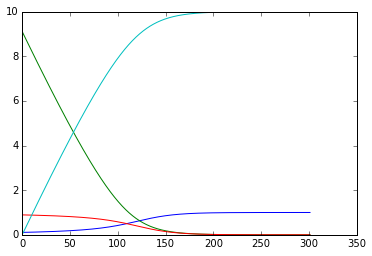

In [4]:
%matplotlib inline
import matplotlib.pyplot as ppl
ppl.plot(trange,y)